In [2]:
import time
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## ASSUMPTIONS

In [23]:
TOTAL_SUPPLY = 1_000_000_000
KAITO_ALLOCATION = 0.0035*TOTAL_SUPPLY

SHARES = {
    "7d": 0.12 * KAITO_ALLOCATION,
    "30d": 0.16 * KAITO_ALLOCATION,
    "90d": 0.22 * KAITO_ALLOCATION,
    "180d": 0.24 * KAITO_ALLOCATION,
    "365d": 0.26 * KAITO_ALLOCATION
}

ROLE={
    'shihan':1.35,
    'senshi':1.25,
    'shugo':1.2,
    'deshi':1.1
}

GALXE_ALLOCTION = 0.035*TOTAL_SUPPLY

## GALXE PART

In [3]:

URL = "https://graphigo.prd.galaxy.eco/query"
HEADERS = {
    "Content-Type": "application/json",
    "Origin": "https://galxe.com",
    "Referer": "https://galxe.com/",
    "User-Agent": "Mozilla/5.0"
}

def build_payload(space_id=58934, page_size=250, cursor=None):
    variables = {
        "id": space_id,
        "pageSize": page_size
    }
    if cursor:
        variables["cursorAfter"] = cursor

    query = """
    query SpaceLeaderboard($id: Int!, $pageSize: Int, $cursorAfter: String) {
      space(id: $id) {
        loyaltyPointsRanks(first: $pageSize, cursorAfter: $cursorAfter) {
          pageInfo {
            endCursor
            hasNextPage
          }
          edges {
            node {
              rank
              points
            }
          }
        }
      }
    }
    """

    return {
        "operationName": "SpaceLeaderboard",
        "variables": variables,
        "query": query
    }



In [4]:
total_points = 0
fetched = 0
page = 1
cursor = None
x=[]
y=[]

while fetched < 50000:
    payload = build_payload(cursor=cursor)
    res = requests.post(URL, headers=HEADERS, json=payload)
    res.raise_for_status()
    json = res.json()

    ranks = json["data"]["space"]["loyaltyPointsRanks"]["edges"]
    page_points = sum(node["node"]["points"] for node in ranks)
    total_points += page_points
    fetched += len(ranks)

    print(f"Page {page}: +{page_points:,} points ({fetched} users)")
    x.append(fetched)
    y.append(total_points)


    page_info = json["data"]["space"]["loyaltyPointsRanks"]["pageInfo"]
    if not page_info["hasNextPage"]:
        break

    cursor = page_info["endCursor"]
    page += 1
    time.sleep(0.3)

print(f"\n✅ Total Loyalty Points of Top {fetched} Users: {total_points:,}")

Page 1: +6,104,703 points (250 users)
Page 2: +5,643,202 points (500 users)
Page 3: +5,510,950 points (750 users)
Page 4: +5,412,363 points (1000 users)
Page 5: +5,343,402 points (1250 users)
Page 6: +5,235,252 points (1500 users)
Page 7: +5,153,600 points (1750 users)
Page 8: +5,103,802 points (2000 users)
Page 9: +5,087,500 points (2250 users)
Page 10: +5,074,101 points (2500 users)
Page 11: +5,024,652 points (2750 users)
Page 12: +4,978,500 points (3000 users)
Page 13: +4,931,752 points (3250 users)
Page 14: +4,894,900 points (3500 users)
Page 15: +4,851,450 points (3750 users)
Page 16: +4,810,302 points (4000 users)
Page 17: +4,776,853 points (4250 users)
Page 18: +4,756,451 points (4500 users)
Page 19: +4,737,201 points (4750 users)
Page 20: +4,713,750 points (5000 users)
Page 21: +4,711,700 points (5250 users)
Page 22: +4,688,000 points (5500 users)
Page 23: +4,680,650 points (5750 users)
Page 24: +4,662,500 points (6000 users)
Page 25: +4,645,351 points (6250 users)
Page 26: +4,

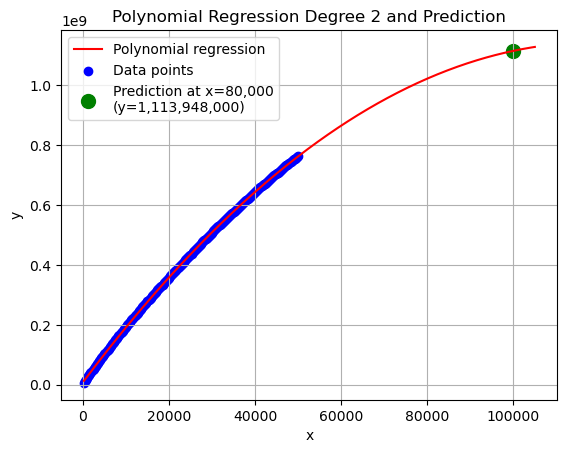

In [5]:
x=np.array(x).reshape(-1, 1)
y=np.array(y)
# Polynomial features degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)
X_plot = np.linspace(min(x), 105000, 500).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

x_pred = np.array([[100000]])
x_pred_poly = poly.transform(x_pred)
y_pred = model.predict(x_pred_poly)

# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot regression curve
plt.plot(X_plot, y_plot, color='red', label='Polynomial regression')

# Mark prediction point
plt.scatter(x_pred, y_pred, color='green', s=100, label=f'Prediction at x=80,000\n(y={int(y_pred[0]):,})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Degree 2 and Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
Total_loyalty_points=int(y_pred)
Total_loyalty_points

1113948000

In [6]:
Total_loyalty_points=1113948000

In [7]:
import requests

URL = "https://graphigo.prd.galaxy.eco/query"
HEADERS = {
    "Content-Type": "application/json",
    "Origin": "https://galxe.com",
    "Referer": "https://galxe.com/",
    "User-Agent": "Mozilla/5.0"
}

def get_loyalty_points(address, space_id=58934, season_id=None):
    variables = {
        "id": space_id,
        "address": f"EVM:{address}"
    }
    if season_id is not None:
        variables["seasonId"] = season_id

    query = """
    query SpaceLoyaltyPoints($id: Int, $address: String!, $seasonId: Int) {
      space(id: $id) {
        id
        addressLoyaltyPoints(address: $address, sprintId: $seasonId) {
          id
          points
          rank
          __typename
        }
        __typename
      }
    }
    """

    payload = {
        "operationName": "SpaceLoyaltyPoints",
        "variables": variables,
        "query": query
    }

    response = requests.post(URL, json=payload, headers=HEADERS)
    response.raise_for_status()
    return response.json()


In [12]:
result = get_loyalty_points("0x7ebdebe88ec46b316fdfb4e783364177c9d6bac9")
points_info = result['data']['space']['addressLoyaltyPoints']
loyalty_points=points_info['points']
loyalty_points

22651

In [15]:
address_allocation= ((loyalty_points*ROLE['deshi'])/Total_loyalty_points)*GALXE_ALLOCTION
address_allocation

779.4021803531225

## KAITO PART

In [ ]:


def fetch_data(window):
    url = "https://kaito.irys.xyz/api/community-mindshare"
    params = {"window": window}
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()

def calculate_allocations(username, data, window):
    share_amount = SHARES[window]
    allocation = 0
    yappers = data.get("community_mindshare", {}).get("top_1000_yappers", [])
    
    for user in yappers:
        if username == user.get("username"):
            mindshare = user.get("mindshare", 0)
            allocation = mindshare * share_amount
    return allocation



In [ ]:
def final_allocation(username):
    timeframes = ["7d", "30d", "90d", "180d", "365d"]
    all_allocations = []
    for tf in timeframes:
        # print(f"Fetching data for {tf} ...")
        data = fetch_data(tf)
        allocs = calculate_allocations(username, data, tf)
        all_allocations.append(allocs)
    #print(all_allocations) 
    return sum(all_allocations)


In [ ]:

username='xaitoshi_'
all_allocations=final_allocation(username)
print(f"Total Allocation: {all_allocations}")


Total Allocation: 33165.03762853291


## TESTING

In [1]:
from allocation import get_address_allocation, get_kaito_allocation

In [5]:
get_address_allocation('0x3326f398e1abfbe6143401beb0d1847994be1c36','shihan')

68.33801936894722